In [15]:
#import mdi.globals as gl
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import os
import pandas as pd


plt.style.use('default')

data = pd.read_csv("/cifs/diedrichsen/data/ModifiedDigitInterference/behavioural/MDI0_merged.csv")
data = data[data.BN>1]
dataG = data.groupby(['SID', 'Quartet', 'PosInQuartet']).mean(numeric_only=True).reset_index()

In [17]:
melted_ipi = dataG.melt(id_vars="QuartetType",value_vars=["ipi1","ipi2","ipi3","ipi4"],var_name="# IPI",value_name="IPI ms")
melted_ipi

,QuartetType,# IPI,IPI ms
0,3.0,ipi1,223.571429
1,3.0,ipi1,180.357143
2,3.0,ipi1,178.214286
3,3.0,ipi1,187.142857
4,1.0,ipi1,206.904762
...,...,...,...
283,1.0,ipi4,299.166667
284,2.0,ipi4,315.476190
285,2.0,ipi4,279.642857
286,2.0,ipi4,283.928571


<Axes: xlabel='# IPI', ylabel='IPI ms'>

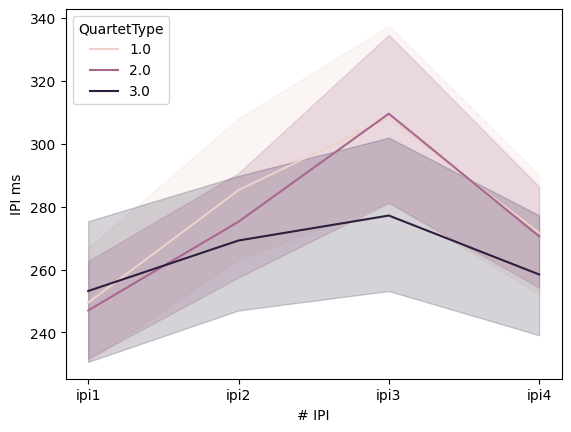

In [19]:
sb.lineplot(data=melted_ipi,x="# IPI",y="IPI ms",hue="QuartetType")

<Axes: xlabel='# IPI', ylabel='IPI ms'>

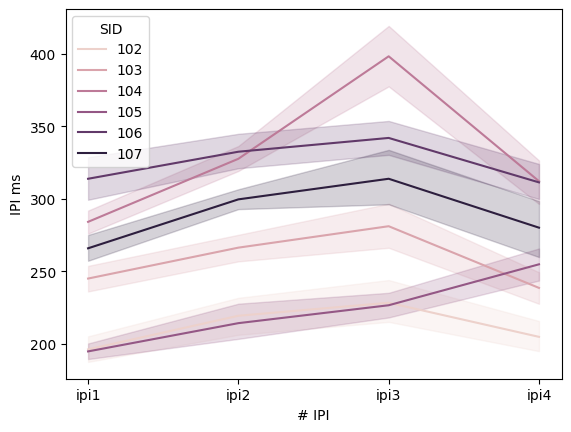

In [21]:
subj_ipi = dataG.melt(id_vars="SID",value_vars=["ipi1","ipi2","ipi3","ipi4"],var_name="# IPI",value_name="IPI ms")
sb.lineplot(data=subj_ipi,x="# IPI",y="IPI ms",hue="SID")

<function matplotlib.pyplot.show(close=None, block=None)>

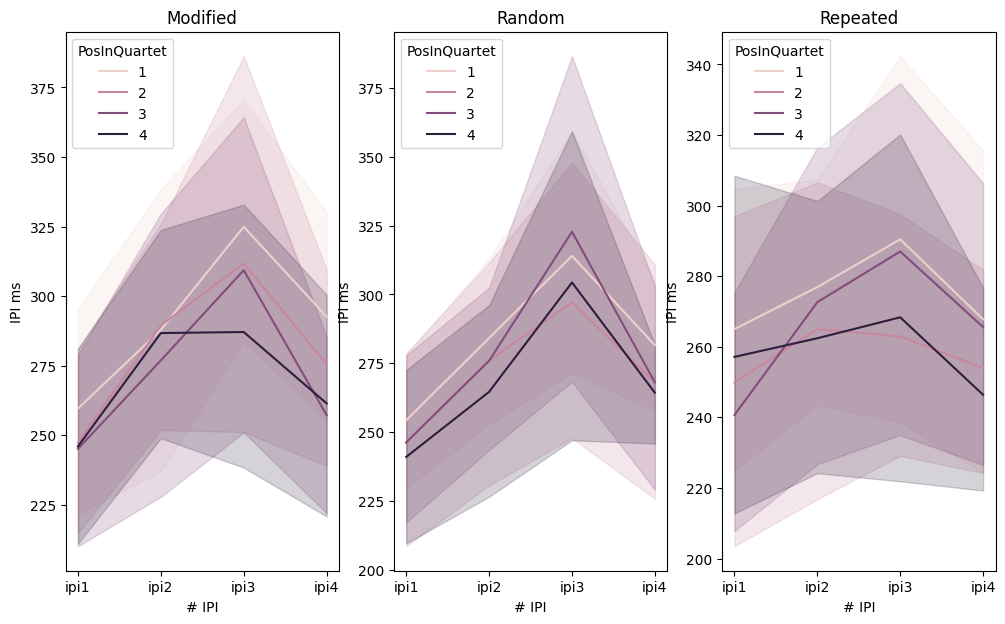

In [42]:
position_ipi = dataG.melt(id_vars=["PosInQuartet","QuartetType"],value_vars=["ipi1","ipi2","ipi3","ipi4"],var_name="# IPI",value_name="IPI ms")
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(12,7))
ax1 = sb.lineplot(data=position_ipi[position_ipi.QuartetType==1.0],x="# IPI",y="IPI ms",hue="PosInQuartet",ax=axes[0])
ax1.set_title("Modified")
ax2 = sb.lineplot(data=position_ipi[position_ipi.QuartetType==2.0],x="# IPI",y="IPI ms",hue="PosInQuartet",ax=axes[1])
ax2.set_title("Random")
ax3 = sb.lineplot(data=position_ipi[position_ipi.QuartetType==3.0],x="# IPI",y="IPI ms",hue="PosInQuartet",ax=axes[2])
ax3.set_title("Repeated")

plt.show

In [31]:
position_ipi

,PosInQuartet,QuartetType,# IPI,IPI ms
0,1,3.0,ipi1,223.571429
1,2,3.0,ipi1,180.357143
2,3,3.0,ipi1,178.214286
3,4,3.0,ipi1,187.142857
4,1,1.0,ipi1,206.904762
...,...,...,...,...
283,4,1.0,ipi4,299.166667
284,1,2.0,ipi4,315.476190
285,2,2.0,ipi4,279.642857
286,3,2.0,ipi4,283.928571
